In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sTools
import Tools
from grizli.aws import db
from grizli import utils
from astropy.io import fits
from astropy.io import ascii

In [2]:
Data=np.load("../Catalogs/SpatialErr_Coord.npy",allow_pickle=True)

In [5]:
np.transpose(Data)[1]

array([list([189.08035969948696, 62.2632799049717]),
       list([189.298505712323, 62.274187577847016]),
       list([189.1447800255712, 62.24551622652085]),
       list([189.12120490656216, 62.286382990598206]),
       list([189.17471872095456, 62.2307963497613]),
       list([189.06964179166823, 62.23053021298586]),
       list([189.32761378008007, 62.23445880439439]),
       list([189.11144908688505, 62.24603572217753]),
       list([189.25617069229398, 62.266274307130615]),
       list([189.22018238980922, 62.22578960943393]),
       list([189.22663827355808, 62.220620902709314]),
       list([189.10846631687522, 62.1846722097299]),
       list([189.0071909732928, 62.24569289821593]),
       list([189.21768817023582, 62.20753232227284]),
       list([189.12033731680424, 62.18437596680862]),
       list([189.3530654531405, 62.24047813243259]),
       list([189.17639324239445, 62.1973130571086]),
       list([189.05843077030772, 62.25191644694211]),
       list([189.3718293185224, 6

## Filtering Sources we need to get Limits

I only take galaxies that have zphot or zLya between 39000 - 49700

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


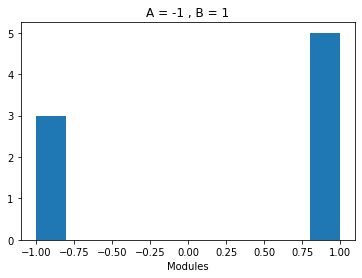

In [38]:
%load_ext autoreload
%autoreload

Catalog=ascii.read("../Catalogs/Binospec-Candels.cat")
Catalog=Catalog[Catalog["inFresco"]=="OnlyFoV"]
z=np.array([])
for gal in Catalog:
    redshift=gal["photoz"]
    if np.isnan(gal["z"])==False:
        redshift=gal["z"]
    z=np.append(z,redshift)

LambdaMin,LambdaMax=39000,49700
Ha=6564.614*(1+z)

m=(Ha>LambdaMin)&(Ha<LambdaMax)
Catalog=Catalog[m]

showPlot=False
Verbose=True
##### Find exposures that overlap a point
Data=[[gal["ra_candels"],gal["dec_candels"]] for gal in Catalog]


modNums=[]

for point in Data:
    temp=sTools.ExposureModules(point,showPlot=showPlot)
    #print(temp)
    modNums.append(temp[1])

np.save("../Catalogs/ExpositionsGrizli_modNums.npy",modNums)
plt.hist(modNums)
plt.xlabel("Modules")
plt.title("A = -1 , B = 1")
plt.show()


11 exposures cover the point [189.2, 62.27]


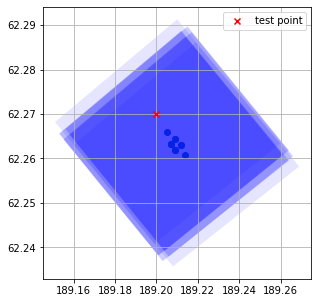

In [40]:
exp=fits.open("../data/large_files/FrescoDatabase/fresco_exposure_footprints.fits")[1].data

coord=[189.2, 62.27]

has_point = np.array([utils.SRegion(fp).path[0].contains_point(coord)
                    for fp in exp['footprint']])

modules=[sTools.FindModule(e) for e in exp[has_point]]


print(f'{has_point.sum()} exposures cover the point {coord}')


fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(exp['crval1'][has_point], exp['crval2'][has_point])
for fp in exp['footprint'][has_point]:
    sr = utils.SRegion(fp)
    
    for p in sr.patch(fc='b', ec='None', alpha=0.1):
        ax.add_patch(p)
        
ax.scatter(*coord, marker='x', color='r', zorder=100, label='test point')
ax.legend()

ax.grid()
ax.set_aspect(1./np.cos(coord[1]/180*np.pi))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


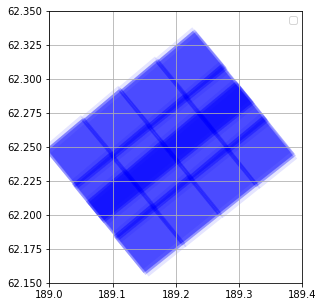

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


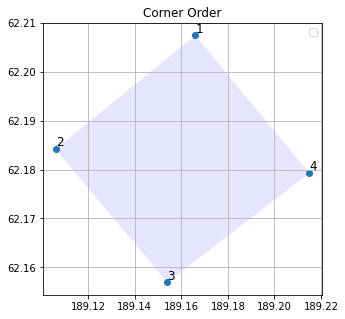

In [41]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
for fp in exp['footprint']:
            sr = utils.SRegion(fp)
            
            for p in sr.patch(fc='b', ec='None', alpha=0.1):
                ax.add_patch(p)
                

ax.set_xlim(189.,189.4)
ax.set_ylim(62.15,62.35)
ax.legend()
ax.grid()
ax.set_aspect(1./np.cos(coord[1]/180*np.pi))
plt.show()

#######
#######

fig, ax = plt.subplots(1,1,figsize=(5,5))
fp=exp['footprint'][178]
sr = utils.SRegion(fp)
for p in sr.patch(fc='b', ec='None', alpha=0.1):
    ax.add_patch(p)
        
#ax.scatter(*coord, marker='x', color='r', zorder=100, label='test point')

ax.legend()
ax.grid()
ax.autoscale_view()
plt.title("Corner Order")
#ax.set_aspect(1./np.cos(coord[1]/180*np.pi))
Corners=np.array(Tools.convert_string_to_2d_array(fp))
Tools.plot_points_with_numbers(np.transpose(Corners))
plt.show()

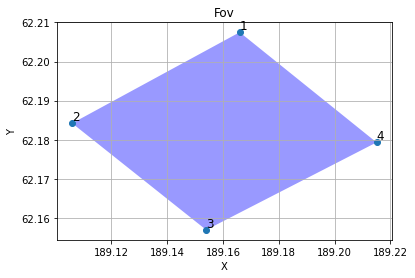

In [42]:
from matplotlib.patches import Polygon

Corners=np.array(Tools.convert_string_to_2d_array(fp))
square = Polygon(list(zip(*Corners)), closed=True, facecolor='blue', alpha=0.4)

fig, ax = plt.subplots()
ax.add_patch(square)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Fov')

ax.autoscale_view()
Tools.plot_points_with_numbers(np.transpose(Corners))
#ax.set_aspect(1./np.cos(coord[1]/180*np.pi))
plt.grid(True)
plt.show()


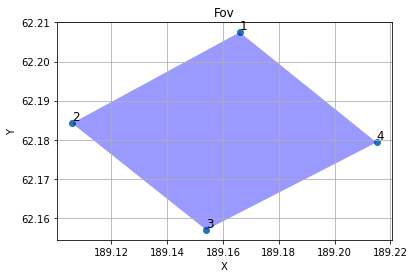

In [43]:


#smallerShape=[[189.18,62.26],[189.2,62.27],[189.22,62.27],[189.22,62.25]]

OrderedCorners=np.transpose(Corners)
square = Polygon(list(zip(*np.transpose(OrderedCorners))), closed=True, facecolor='blue', alpha=0.4)
#square2 = Polygon(list(zip(*np.transpose(smallerShape))), closed=True, facecolor='blue', alpha=0.4)

fig, ax = plt.subplots()
Tools.plot_points_with_numbers(OrderedCorners)
ax.add_patch(square)
#ax.add_patch(square2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Fov')
ax.autoscale_view()
plt.grid(True)
plt.show()

In [44]:
from skimage.transform import ProjectiveTransform

t = ProjectiveTransform()
src = np.asarray(OrderedCorners)
dst = np.asarray([[0, 0], [0, 2040], [2040, 2040], [2040, 0]])
if not t.estimate(src, dst): raise Exception("estimate failed")

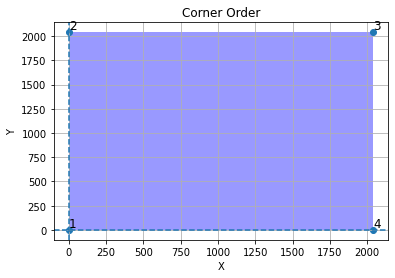

In [45]:
SquaredCorner=t(OrderedCorners)
#SquaredShape=t(smallerShape)


square = Polygon(list(zip(*np.transpose(SquaredCorner))), closed=True, facecolor='blue', alpha=0.4)
#square2 = Polygon(list(zip(*np.transpose(SquaredShape))), closed=True, facecolor='blue', alpha=0.4)
fig, ax = plt.subplots()
ax.add_patch(square)
#ax.add_patch(square2)
#Inverted order of points to clockwise
Tools.plot_points_with_numbers(SquaredCorner)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Fov')
ax.axvline(x=0,ls="--")
ax.axhline(y=0,ls="--")
ax.autoscale_view()
plt.title("Corner Order")
plt.grid(True)
plt.show()

In [78]:
gals=[[gal["ra_candels"],gal["dec_candels"]] for gal in Catalog]
voff=[5 for gal in Catalog]
exp=fits.open("../data/large_files/FrescoDatabase/fresco_exposure_footprints.fits")[1].data

def all_equal(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == x for x in iterator)

def check_majority(array):
    element_count = {}
    for element in array:
        if element in element_count:
            element_count[element] += 1
        else:
            element_count[element] = 1
    
    max_frequency = max(element_count.values())
    if max_frequency > len(array) * 0.9:
        return True
    else:
        return False

Result=[]
for coord,voff in zip(gals[:],voff[:]):
    print(coord)
    has_point = np.array([utils.SRegion(fp).path[0].contains_point(coord)
                        for fp in exp['footprint']])

    temp=[]
    pixs=[]
    for e in exp[has_point]:
        thisExp={"module":None,"pix":None,"offset":voff,"coord":coord}
        thisExp["module"]=sTools.FindModule(e) 

        #Get pixel coord
        Corners=np.array(Tools.convert_string_to_2d_array(e["footprint"]))
        OrderedCorners=np.transpose(Corners)
        t = ProjectiveTransform()
        src = np.asarray(OrderedCorners)
        dst = np.asarray([[0, 0], [0, 2040], [2040, 2040], [2040, 0]])
        if not t.estimate(src, dst): raise Exception("estimate failed")
        PixGal=t(coord)
        PixGal=np.round(PixGal).astype(int)

        thisExp["pix"]=PixGal
        pixs.append(PixGal)
        temp.append(thisExp)

    modules=[t["module"] for t in temp]

    #print(pixs)
    #print(np.std(np.transpose(pixs)[0][0]),np.std(np.transpose(pixs)[1][0]))

    print(pixs)
    if check_majority(modules)==True:
        #Result.append(temp)
        Result.append({"module":modules[0],"pix":np.round(np.mean(pixs,axis=0)).astype(int),"offset":voff,"coord":coord})



#temp=[]
#for r in Result:
#    for rr in r:
#        temp.append(rr)
#Result=temp

[189.29243224, 62.20507331]
[array([[2013, 1384]])]
[189.10564701, 62.28967745]
[array([[ 36, 280]]), array([[ 43, 184]]), array([[ 36, 280]]), array([[ 43, 184]]), array([[ 43, 184]]), array([[174, 255]])]
[189.11707452, 62.29422623]
[array([[ 121, 1819]])]
[189.28349852, 62.20304881]
[array([[1954, 1642]])]
[189.14218702, 62.30436488]
[array([[106, 932]])]
[189.32031105, 62.23344178]
[array([[1336, 1693]]), array([[1345, 1778]]), array([[1438, 1784]]), array([[1442, 1685]]), array([[1336, 1693]]), array([[1345, 1778]]), array([[1438, 1784]]), array([[1442, 1685]]), array([[1442, 1685]]), array([[1195, 1754]]), array([[1579, 1757]])]
[189.34225365, 62.26284548]
[array([[414, 195]]), array([[412, 287]]), array([[503, 294]]), array([[508, 198]]), array([[414, 195]]), array([[412, 287]]), array([[503, 294]]), array([[508, 198]]), array([[508, 198]]), array([[278, 251]]), array([[654, 252]])]
[189.15639949, 62.19771589]
[array([[266, 439]]), array([[262, 529]]), array([[365, 520]]), array

## Use plane equation Obtained in the accompanying notebook

z=ax+by+c

Module A : a = 7.0559e-25 , b = -2.8728e-25 , c = 9.2575e-21

Module B : a = -1.6695-24 , b = 3.8116-25 , c = 1.2777e-20

These are flux densities.

In [86]:

def ErrorPlane(data):
    x,y= data["pix"][0]
    if data["module"]=="A":
        err=7.0559e-25*x + -2.8728e-25*y + 9.2575e-21
    if data["module"]=="B":
        err=-1.6695e-24*x + 3.8116e-25*y + 1.2777e-20
    return err


Errors=[]
for ob,gal in zip(Result,Catalog):
    Errors.append([gal["id_charlotte"],ErrorPlane(ob)])

np.save("../Catalogs/OnlyFoV_HaFluxErr.npy",Errors)